<a href="https://colab.research.google.com/github/najlaatikahdwirahma/FinalProject/blob/main/ML_Churn2Bulan_master(erda).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Machine Learning

## Model

### Baseline Model

In [ ]:
df_master_2month = pd.read_parquet('/content/drive/MyDrive/[DS Final Project] Team Athena/[FIX] Dataset Churn Final/df_master_2bulan.parquet')

In [ ]:
df_master_2month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41504 entries, 0 to 41503
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   customer_id            41504 non-null  int64         
 1   name                   41504 non-null  object        
 2   username               41504 non-null  object        
 3   email                  41504 non-null  object        
 4   gender                 41504 non-null  category      
 5   birthdate              41504 non-null  datetime64[ns]
 6   device_type            41504 non-null  category      
 7   device_id              41504 non-null  object        
 8   device_version         41504 non-null  category      
 9   home_location_lat      41504 non-null  float64       
 10  home_location_long     41504 non-null  float64       
 11  home_country           41504 non-null  category      
 12  first_join_date        41504 non-null  datetime64[ns]
 13  u

In [ ]:
df_master_2month.head(2)

,customer_id,name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,...,total_promo_amount,avg_homepage,avg_scroll,avg_click,item_detail,avg_promo_page,avg_search,avg_add_to_cart,avg_add_promo,churn
0,3,Ganep Mustofa,76412a05-64ab-4e8c-b275-a7181b5c0b9d,76412a05_64ab_4e8c_b275_a7181b5c0b9d@startupca...,M,1986-07-12,Android,dd0c9125-c645-4b82-8d4b-a1cd1e2dba20,Android 3.2.3,-6.151858,...,5941311.25,2.214556,1.304348,2.019849,0.891304,0.630435,1.043478,2.945652,0.521739,0
1,9,Hesti Purwanti,8abe001b-5d2e-4af1-8c12-0b44309d38ca,8abe001b_5d2e_4af1_8c12_0b44309d38ca@startupca...,F,2006-04-05,Android,ece472e7-ab36-4d85-aca0-2df8491189fe,Android 5.1.1,-6.035939,...,0.00,1.000000,0.750000,1.375000,0.625000,0.375000,0.500000,2.000000,0.000000,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
df_master_2month['gender_encoded'] = label_encoder.fit_transform(df_master_2month['gender'])
df_master_2month['device_type_encoded'] = label_encoder.fit_transform(df_master_2month['device_type'])

In [ ]:
df_split = df_master_2month.copy()
df_split.drop(['customer_id', 'name', 'username', 'email', 'gender', 'birthdate', 'device_type', 'device_id', 'device_version', 'home_country', 'first_join_date'], axis = 1, inplace = True)

In [ ]:
df_split.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41504 entries, 0 to 41503
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   home_location_lat      41504 non-null  float64
 1   home_location_long     41504 non-null  float64
 2   umur                   41504 non-null  int64  
 3   subscription_duration  41504 non-null  float64
 4   average_spending       41504 non-null  float64
 5   avg_amount             41504 non-null  float64
 6   total_quantity         41504 non-null  float64
 7   avg_quantity           41504 non-null  float64
 8   avg_item_price         41504 non-null  float64
 9   frequency_trx          41504 non-null  float64
 10  total_unique_product   41504 non-null  float64
 11  total_promo_amount     41504 non-null  float64
 12  avg_homepage           41504 non-null  float64
 13  avg_scroll             41504 non-null  float64
 14  avg_click              41504 non-null  float64
 15  it

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from scipy.stats import uniform
import warnings
warnings.filterwarnings('ignore')
import xgboost as xgb
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report, roc_auc_score, balanced_accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve

In [ ]:
df_split.head(2)

,home_location_lat,home_location_long,umur,subscription_duration,average_spending,avg_amount,total_quantity,avg_quantity,avg_item_price,frequency_trx,...,avg_scroll,avg_click,item_detail,avg_promo_page,avg_search,avg_add_to_cart,avg_add_promo,churn,gender_encoded,device_type_encoded
0,-6.151858,106.945839,37,5.227397,2.196828e+07,1.711080e+07,411.0,11.3,2.096325e+06,46.0,...,1.304348,2.019849,0.891304,0.630435,1.043478,2.945652,0.521739,0,1,0
1,-6.035939,106.747580,17,2.389041,3.220515e+06,2.638665e+06,70.0,2.0,7.292925e+05,6.0,...,0.750000,1.375000,0.625000,0.375000,0.500000,2.000000,0.000000,0,0,0


In [ ]:
y = df_split.pop('churn')
X = df_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size= 0.8, random_state=50)

print("X_train dataset shape =", X_train.shape)
print("y_train dataset shape =", y_train.shape)
print("X_test dataset shape  =", X_test.shape)
print("y_test dataset shape  =", y_test.shape)

X_train dataset shape = (33203, 22)
y_train dataset shape = (33203,)
X_test dataset shape  = (8301, 22)
y_test dataset shape  = (8301,)


In [ ]:
dt_model = DecisionTreeClassifier()
clf = dt_model.fit(X_train, y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test, y_test)
print("Decision Tree accuracy =", accuracy_dt)

Decision Tree accuracy = 0.9707264185037947


In [ ]:
print(classification_report(y_test, predictdt_y))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      4345
           1       0.97      0.97      0.97      3956

    accuracy                           0.97      8301
   macro avg       0.97      0.97      0.97      8301
weighted avg       0.97      0.97      0.97      8301



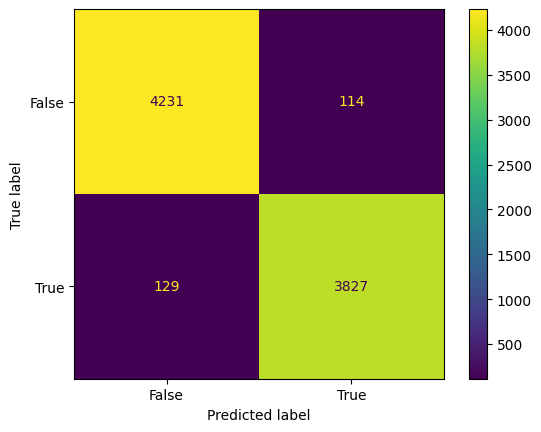

In [ ]:
actual = y_test
predicted = predictdt_y

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
auc = metrics.roc_auc_score(y_test, predictdt_y)
print(auc)

0.9705771251313354


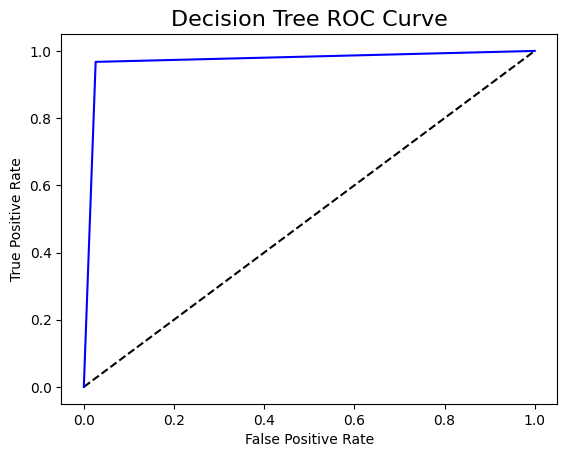

In [ ]:
#ROC
y_dtpred_prob = dt_model.predict_proba(X_test)[:,1]
fpr_dt, tpr_dt, thresholds = roc_curve(y_test, y_dtpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_dt, tpr_dt, label='Decision Tree',color = "b")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve', fontsize=16)
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acc_nb = round(metrics.accuracy_score(y_test, y_pred) * 100, 2)
print("Gaussian Naive Bayes accuracy =", acc_nb)

Gaussian Naive Bayes accuracy = 83.97


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.72      0.83      4345
           1       0.76      0.97      0.85      3956

    accuracy                           0.84      8301
   macro avg       0.86      0.85      0.84      8301
weighted avg       0.86      0.84      0.84      8301



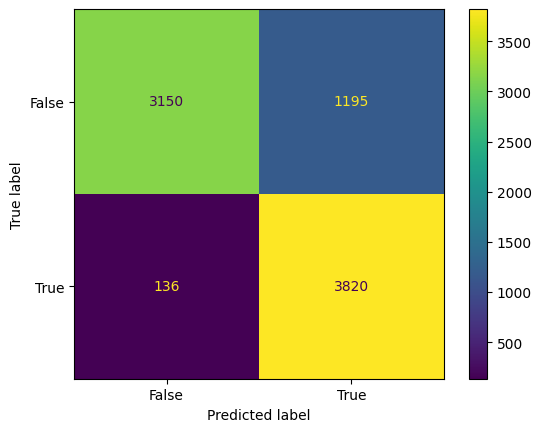

In [ ]:
actual = y_test
predicted = y_pred

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
auc = metrics.roc_auc_score(y_test, y_pred)
print(auc)

0.8452965357715072


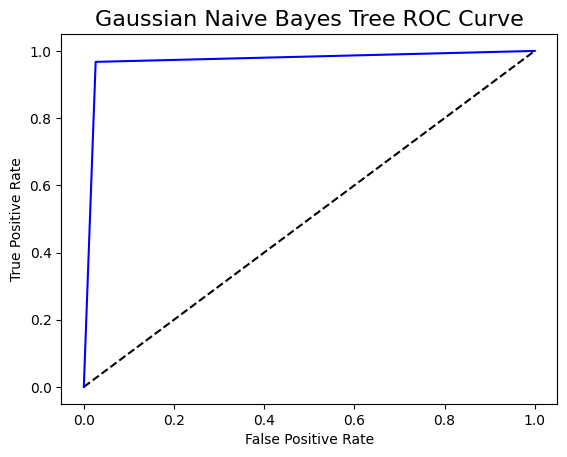

In [ ]:
#ROC
y_dtpred_prob = dt_model.predict_proba(X_test)[:,1]
fpr_gnb, tpr_gnb, thresholds = roc_curve(y_test, y_dtpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_gnb, tpr_gnb, label='Gaussian Naive Bayes',color = "b")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gaussian Naive Bayes Tree ROC Curve',fontsize=16)
plt.show();

In [ ]:
def prediction(x_train, y_train, x_test, y_test, clf, model_name='decision tree'):

    clf = clf
    clf.fit(x_train, y_train)
    y_test_pred = clf.predict(x_test)
    y_train_pred = clf.predict(x_train)


    result = dict()
    test_result = get_metrics(y_pred=y_test_pred, y_act=y_test, model_name=model_name)
    train_result = get_metrics(y_pred=y_train_pred, y_act=y_train, model_name=model_name)

    result['test'] = test_result
    result['train'] = train_result
    result['y_test'] = y_test
    result['y_test_pred'] = y_test_pred
    result['y_train'] = y_train
    result['y_train_pred'] = y_train_pred
    result['clf'] = clf
    result['x_train'] = x_train
    result['x_test'] = x_test

    del clf

    return result

In [ ]:
def get_metrics(y_pred, y_act, model_name):
    recall =  recall_score(y_act, y_pred)
    precision = precision_score(y_act, y_pred)
    roc_auc = roc_auc_score(y_act, y_pred)
    f1 = f1_score(y_act, y_pred)
    accuracy = accuracy_score(y_act, y_pred)

    metrics_result = dict(model_name=model_name,
                        recall=recall,
                        precision=precision,
                        roc_auc=roc_auc,
                        f1=f1,
                        accuracy=accuracy)

    return metrics_result

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model_1_result = prediction(X_train, y_train, X_test, y_test, xgb.XGBClassifier(random_state=42), model_name='xgboost')

In [ ]:
model_2_result = prediction(X_train, y_train, X_test, y_test, LogisticRegression(), model_name='logistic regression')

In [ ]:
model_3_result = prediction(X_train, y_train, X_test, y_test, RandomForestClassifier(random_state=42), model_name='random forest')

In [ ]:
model_4_result = prediction(X_train, y_train, X_test, y_test, KNeighborsClassifier(), model_name='kNN')

In [ ]:
model_5_result = prediction(X_train, y_train, X_test, y_test, DecisionTreeClassifier(), model_name='decision tree')

In [ ]:
baseline_train = pd.DataFrame([
              model_1_result['train'],
              model_2_result['train'],
              model_3_result['train'],
              model_4_result['train'],
              model_5_result['train'],
              ])
baseline_train.sort_values(by=['accuracy'], ascending=False)

,model_name,recall,precision,roc_auc,f1,accuracy
2,random forest,1.000000,1.000000,1.000000,1.00000,1.000000
4,decision tree,1.000000,1.000000,1.000000,1.00000,1.000000
0,xgboost,0.999872,0.999808,0.999851,0.99984,0.999849
3,kNN,0.931220,0.906590,0.922868,0.91874,0.922387
1,logistic regression,0.910061,0.847188,0.881906,0.87750,0.880282


In [ ]:
baseline_model = pd.DataFrame([
              model_1_result['test'],
              model_2_result['test'],
              model_3_result['test'],
              model_4_result['test'],
              model_5_result['test'],
              ])
baseline_model.sort_values(by=['accuracy'], ascending=False)

,model_name,recall,precision,roc_auc,f1,accuracy
0,xgboost,0.983822,0.978627,0.982130,0.981218,0.982050
2,random forest,0.978008,0.970404,0.975425,0.974191,0.975304
4,decision tree,0.969919,0.970410,0.971496,0.970164,0.971570
3,kNN,0.890293,0.871998,0.885653,0.881051,0.885435
1,logistic regression,0.907988,0.846371,0.878965,0.876098,0.877605


### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Decision Tree

parameters = {'max_features': ['log2', 'sqrt', 'auto'],
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10, 50],
              'min_samples_split': [2, 3, 50, 100],
              'min_samples_leaf': [1, 5, 8, 10]
              }

grid_obj = GridSearchCV(clf, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

clf = grid_obj.best_estimator_

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

acc_dt = round(metrics.accuracy_score(y_test, y_pred) * 100, 2)
print("Decision Tree accuracy =", acc_dt)

Decision Tree accuracy = 93.76


In [ ]:
print("Best algorithm =", grid_obj.best_estimator_.get_params())

Best algorithm = {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 50, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 50, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [ ]:
parameter = grid_obj.best_estimator_.get_params()
type(parameter)

dict

In [ ]:
pd.DataFrame.from_dict(parameter, orient='index')

,0
ccp_alpha,0.0
class_weight,None
criterion,entropy
max_depth,50
max_features,sqrt
max_leaf_nodes,None
min_impurity_decrease,0.0
min_samples_leaf,1
min_samples_split,50
min_weight_fraction_leaf,0.0


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      4345
           1       0.94      0.93      0.93      3956

    accuracy                           0.94      8301
   macro avg       0.94      0.94      0.94      8301
weighted avg       0.94      0.94      0.94      8301



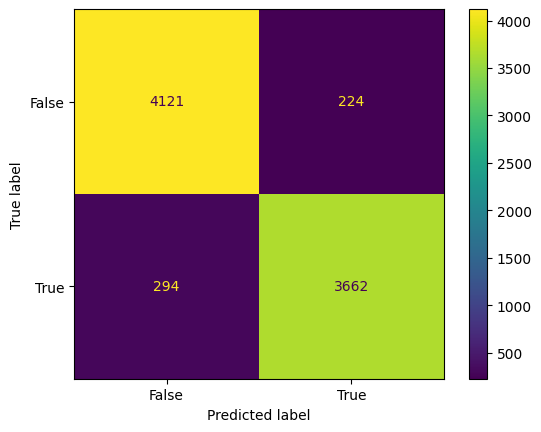

In [ ]:
actual = y_test
predicted = y_pred

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
hyperparameters = parameters = {'max_features': ['log2', 'sqrt', 'auto'],
                               'criterion': ['entropy', 'gini'],
                               'max_depth': [2, 3, 5, 10, 50],
                               'min_samples_split': [2, 3, 50, 100],
                               'min_samples_leaf': [1, 5, 8, 10]
                               }

dectree = DecisionTreeClassifier(random_state=50)
model = RandomizedSearchCV(dectree, hyperparameters, cv=5, random_state=50, scoring='recall')

dectree_hyper = prediction(X_train, y_train, X_test, y_test, model, model_name='DecisionTree_hyperparam')

In [ ]:
parameters = {'max_features': ['log2', 'sqrt','auto'],
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10, 50],
              'min_samples_split': [2, 3, 50, 100],
              'min_samples_leaf': [1, 5, 8, 10]
             }

In [ ]:
# Logistic Regression

# Create a Logistic regression classifier
logreg = LogisticRegression()

# Train the model using the training sets
logreg.fit(X_train, y_train)

# Prediction on test data
y_pred = logreg.predict(X_test)

# Calculating the accuracy
acc_logreg = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of Logistic Regression model : ', acc_logreg )

Accuracy of Logistic Regression model :  87.76


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88      4345
           1       0.85      0.91      0.88      3956

    accuracy                           0.88      8301
   macro avg       0.88      0.88      0.88      8301
weighted avg       0.88      0.88      0.88      8301



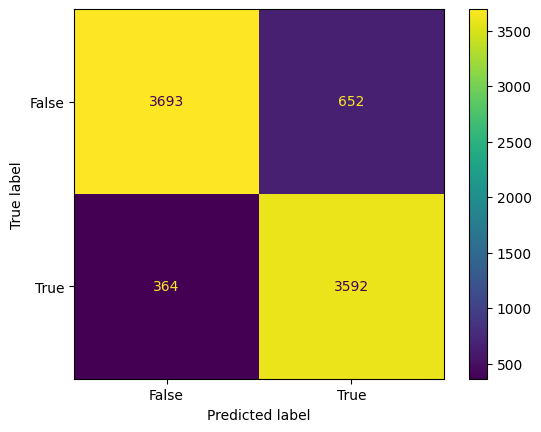

In [ ]:
actual = y_test
predicted = y_pred

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
#Random Forest

rf = RandomForestClassifier()

parameters = {'n_estimators': [4, 6, 9, 10, 15],
              'max_features': ['log2', 'sqrt','auto'],
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10],
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 5, 8]
             }

grid_obj = GridSearchCV(rf, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

rf = grid_obj.best_estimator_

rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)

acc_rf = round( metrics.accuracy_score(y_test, y_pred) * 100 , 2 )
print( 'Random Forest accuracy =', acc_rf )

Random Forest accuracy = 96.41


In [ ]:
print("Best algorithm =", grid_obj.best_estimator_.get_params())

Best algorithm = {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 15, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [ ]:
parameter = grid_obj.best_estimator_.get_params()
type(parameter)

dict

In [ ]:
pd.DataFrame.from_dict(parameter, orient='index')

,0
bootstrap,True
ccp_alpha,0.0
class_weight,None
criterion,entropy
max_depth,10
max_features,sqrt
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_samples_leaf,1


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      4345
           1       0.95      0.98      0.96      3956

    accuracy                           0.96      8301
   macro avg       0.96      0.96      0.96      8301
weighted avg       0.96      0.96      0.96      8301



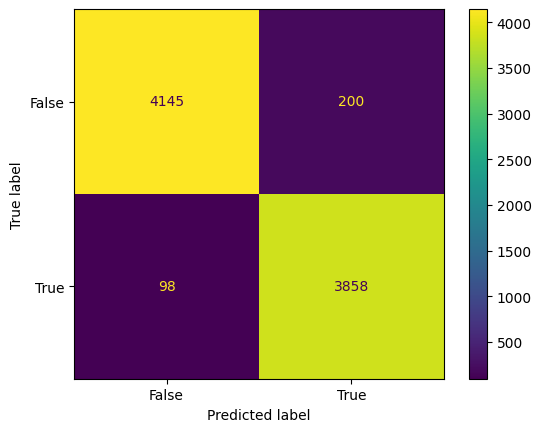

In [ ]:
actual = y_test
predicted = y_pred

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

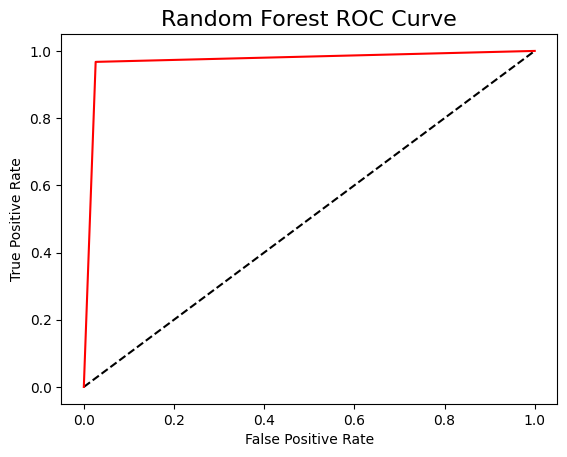

In [ ]:
y_dtpred_prob = dt_model.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_dtpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();

In [ ]:
from random import randint
from scipy.stats import randint

In [ ]:
param_dist = {"max_depth": [3, None],
			        "max_features": randint(1, 9),
			        "min_samples_leaf": randint(1, 9),
			        "criterion": ["gini", "entropy"]
              }

# Instantiating Decision Tree classifier
tree = DecisionTreeClassifier()

# Instantiating RandomizedSearchCV object
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5)

tree_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 8, 'min_samples_leaf': 4}
Best score is 0.9644854314257391


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      4345
           1       0.95      0.98      0.96      3956

    accuracy                           0.96      8301
   macro avg       0.96      0.96      0.96      8301
weighted avg       0.96      0.96      0.96      8301



In [ ]:
# K - Nearest Neighbors

# Create a KNN Classifier
knn = KNeighborsClassifier()

# Hyperparameter Optimization
parameters = {'n_neighbors': [3, 4, 5, 10],
              'weights': ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size' : [10, 20, 30, 50]
             }

# Run the grid search
grid_obj = GridSearchCV(knn, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the knn to the best combination of parameters
knn = grid_obj.best_estimator_

# Train the model using the training sets
knn.fit(X_train,y_train)

# Prediction on test data
y_pred = knn.predict(X_test)

# Calculating the accuracy
acc_knn = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of KNN model : ', acc_knn )

Accuracy of KNN model :  88.9


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      4345
           1       0.87      0.90      0.89      3956

    accuracy                           0.89      8301
   macro avg       0.89      0.89      0.89      8301
weighted avg       0.89      0.89      0.89      8301



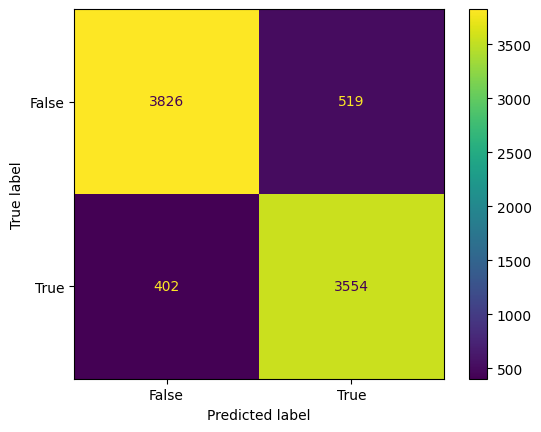

In [ ]:
actual = y_test
predicted = y_pred

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
def get_metrics(y_pred, y_act, model_name):
    recall =  recall_score(y_act, y_pred)
    precision = precision_score(y_act, y_pred)
    roc_auc = roc_auc_score(y_act, y_pred)
    f1 = f1_score(y_act, y_pred)
    accuracy = balanced_accuracy_score(y_act, y_pred)

    metrics_result = dict(model_name=model_name,
                        recall=recall,
                        precision=precision,
                        roc_auc=roc_auc,
                        f1=f1,
                        accuracy=accuracy)

    return metrics_result

In [ ]:
#function for feature importance
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=x.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

In [ ]:
#function for hyperparameter
def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

In [ ]:
#function for prediction
def prediction(x_train, y_train, x_test, y_test, clf, model_name='decision tree'):

    clf = clf
    clf.fit(x_train, y_train)
    y_test_pred = clf.predict(x_test)
    y_train_pred = clf.predict(x_train)


    result = dict()
    test_result = get_metrics(y_pred=y_test_pred, y_act=y_test, model_name=model_name)
    train_result = get_metrics(y_pred=y_train_pred, y_act=y_train, model_name=model_name)

    result['test'] = test_result
    result['train'] = train_result
    result['y_test'] = y_test
    result['y_test_pred'] = y_test_pred
    result['y_train'] = y_train
    result['y_train_pred'] = y_train_pred
    result['clf'] = clf
    result['x_train'] = x_train
    result['x_test'] = x_test

    del clf

    return result

In [ ]:
#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
xg = xgb.XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='recall')

# Predict & Evaluation
xg_hyper = prediction(X_train, y_train, X_test, y_test, xg_tuned, model_name='xgboost_hyperparam')

In [ ]:
show_best_hyperparameter(xg_tuned.best_estimator_, hyperparameters)

Best max_depth: 70
Best min_child_weight: 10
Best gamma: 0.8
Best tree_method: auto
Best colsample_bytree: 0.5
Best eta: 0.020202020202020204
Best lambda: 0.8
Best alpha: 0.6000000000000001


In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest',
              'K - Nearest Neighbors'],
    'Score': [acc_logreg, acc_nb, acc_dt, acc_rf, acc_knn]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,96.41
2,Decision Tree,93.76
4,K - Nearest Neighbors,88.90
0,Logistic Regression,87.76
1,Naive Bayes,83.97


In [ ]:
# List Hyperparameters yang akan diuji
penalty = ['l2']
C = [0.0001] # Inverse of regularization strength; smaller values specify stronger regularization.
hyperparameters = dict(penalty=penalty, C=C)

# Inisiasi model
logres = LogisticRegression(random_state=42) # Init Logres dengan Gridsearch, cross validation = 5
model = RandomizedSearchCV(logres, hyperparameters, cv=5, random_state=42, scoring='recall')

# Fitting Model & Evaluation
logres_hyper = prediction(X_train, y_train, X_test, y_test, model, model_name='logistic regression_hyperparam')

In [ ]:
# Creating the hyperparameter grid
hyperparameters = {'max_features': ['log2', 'sqrt','auto'],
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10, 50],
              'min_samples_split': [2, 3, 50, 100],
              'min_samples_leaf': [1, 5, 8, 10]
             }

# Instantiating Decision Tree classifier
tree = DecisionTreeClassifier()

# Instantiating RandomizedSearchCV object
model = RandomizedSearchCV(tree, hyperparameters, cv=5, random_state=42, scoring='recall')

dectree_hyper = prediction(X_train, y_train, X_test, y_test, model, model_name='decision tree_hyperparam')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      4345
           1       0.87      0.90      0.89      3956

    accuracy                           0.89      8301
   macro avg       0.89      0.89      0.89      8301
weighted avg       0.89      0.89      0.89      8301



In [ ]:
# Creating the hyperparameter grid
hyperparameters = {'n_neighbors': [3, 4, 5, 10],
              'weights': ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size' : [10, 20, 30, 50]
             }

# Instantiating KNN classifier
knn = KNeighborsClassifier()

# Instantiating RandomizedSearchCV object
model = RandomizedSearchCV(knn, hyperparameters, cv=5, random_state=42, scoring='recall')

knn_hyper = prediction(X_train, y_train, X_test, y_test, model, model_name='knn_hyperparam')

In [ ]:
# Creating the hyperparameter grid
hyperparameters = {'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)}

# Instantiating KNN classifier
xgbmodel = xgb.XGBClassifier(random_state=42)

# Instantiating RandomizedSearchCV object
model = RandomizedSearchCV(xgbmodel, hyperparameters, cv=5, random_state=42, scoring='recall')

xgb_hyper = prediction(X_train, y_train, X_test, y_test, model, model_name='xgboost_hyperparam')

In [ ]:
# Creating the hyperparameter grid
hyperparameters = {'n_estimators': [6, 9, 10],
              'max_features': ['log2', 'sqrt','auto'],
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 5, 10],
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 5, 8]
             }

# Instantiating Random Forest classifier
rf = RandomForestClassifier()

# Instantiating RandomizedSearchCV object
model = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=42, scoring='recall')

rf_hyper = prediction(X_train, y_train, X_test, y_test, model, model_name='random forest_hyperparam')

In [ ]:
hyperparameter_model_train = pd.DataFrame([
              logres_hyper['train'],
              dectree_hyper['train'],
              knn_hyper['train'],
              xgb_hyper['train'],
              rf_hyper['train'],
              ])
hyperparameter_model_train.sort_values(by=['accuracy'], ascending=False)

,model_name,recall,precision,roc_auc,f1,accuracy
2,knn_hyperparam,1.000000,1.000000,1.000000,1.000000,1.000000
3,xgboost_hyperparam,1.000000,1.000000,1.000000,1.000000,1.000000
4,random forest_hyperparam,0.985937,0.969697,0.979243,0.977750,0.979243
1,decision tree_hyperparam,0.958770,0.901382,0.932657,0.929191,0.932657
0,logistic regression_hyperparam,0.910061,0.847188,0.881906,0.877500,0.881906


In [ ]:
hyperparameter_model = pd.DataFrame([
              logres_hyper['test'],
              dectree_hyper['test'],
              knn_hyper['test'],
              xgb_hyper['test'],
              rf_hyper['test'],
              ])
hyperparameter_model.sort_values(by=['accuracy'], ascending=False)

,model_name,recall,precision,roc_auc,f1,accuracy
3,xgboost_hyperparam,0.983569,0.979361,0.982348,0.981460,0.982348
4,random forest_hyperparam,0.972700,0.950593,0.963335,0.961519,0.963335
1,decision tree_hyperparam,0.946411,0.886364,0.917969,0.915403,0.917969
2,knn_hyperparam,0.898382,0.872575,0.889467,0.885291,0.889467
0,logistic regression_hyperparam,0.907988,0.846371,0.878965,0.876098,0.878965


In [ ]:
hyperparameter_model_train = pd.DataFrame([
              logres_hyper['train'],
              dectree_hyper['train'],
              knn_hyper['train'],
              xgb_hyper['train'],
              rf_hyper['train'],
              ])
hyperparameter_model_train.sort_values(by=['accuracy'], ascending=False)

,model_name,recall,precision,roc_auc,f1,accuracy
2,knn_hyperparam,1.000000,1.000000,1.000000,1.000000,1.000000
3,xgboost_hyperparam,1.000000,1.000000,1.000000,1.000000,1.000000
4,random forest_hyperparam,0.985937,0.969697,0.979243,0.977750,0.979243
1,decision tree_hyperparam,0.958770,0.901382,0.932657,0.929191,0.932657
0,logistic regression_hyperparam,0.910061,0.847188,0.881906,0.877500,0.881906


In [ ]:
hyperparameter_model = pd.DataFrame([
              logres_hyper['test'],
              dectree_hyper['test'],
              knn_hyper['test'],
              xgb_hyper['test'],
              rf_hyper['test'],
              ])
hyperparameter_model.sort_values(by=['accuracy'], ascending=False)

,model_name,recall,precision,roc_auc,f1,accuracy
3,xgboost_hyperparam,0.983569,0.979361,0.982348,0.981460,0.982348
4,random forest_hyperparam,0.972700,0.950593,0.963335,0.961519,0.963335
1,decision tree_hyperparam,0.946411,0.886364,0.917969,0.915403,0.917969
2,knn_hyperparam,0.898382,0.872575,0.889467,0.885291,0.889467
0,logistic regression_hyperparam,0.907988,0.846371,0.878965,0.876098,0.878965


### Cross Validation

In [ ]:
#cross validation for decision tree
# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(tree_cv, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)
print("Average MAE score (across experiments):")
print(scores.mean())

MAE scores:
 [0.03782677 0.03348994 0.03047826 0.03529695 0.02951807]
Average MAE score (across experiments):
0.03332199778514129


In [ ]:
#cross validation for random forest
# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(rf.fit(X_train,y_train), X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)
print("Average MAE score (across experiments):")
print(scores.mean())

MAE scores:
 [0.02445488 0.02493675 0.02096133 0.02312974 0.02337349]
Average MAE score (across experiments):
0.02337124138041142


In [ ]:
#cross validation for logistic regression
# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(logreg.fit(X_train, y_train), X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)
print("Average MAE score (across experiments):")
print(scores.mean())

MAE scores:
 [0.43886279 0.1242019  0.11781713 0.43741718 0.11409639]
Average MAE score (across experiments):
0.2464790771325272


In [ ]:
#cross validation for KNN
# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(knn.fit(X_train,y_train), X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)
print("Average MAE score (across experiments):")
print(scores.mean())

MAE scores:
 [0.11046862 0.1075774  0.1068546  0.11516685 0.10421687]
Average MAE score (across experiments):
0.10885686584429513


## Feature Selection

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

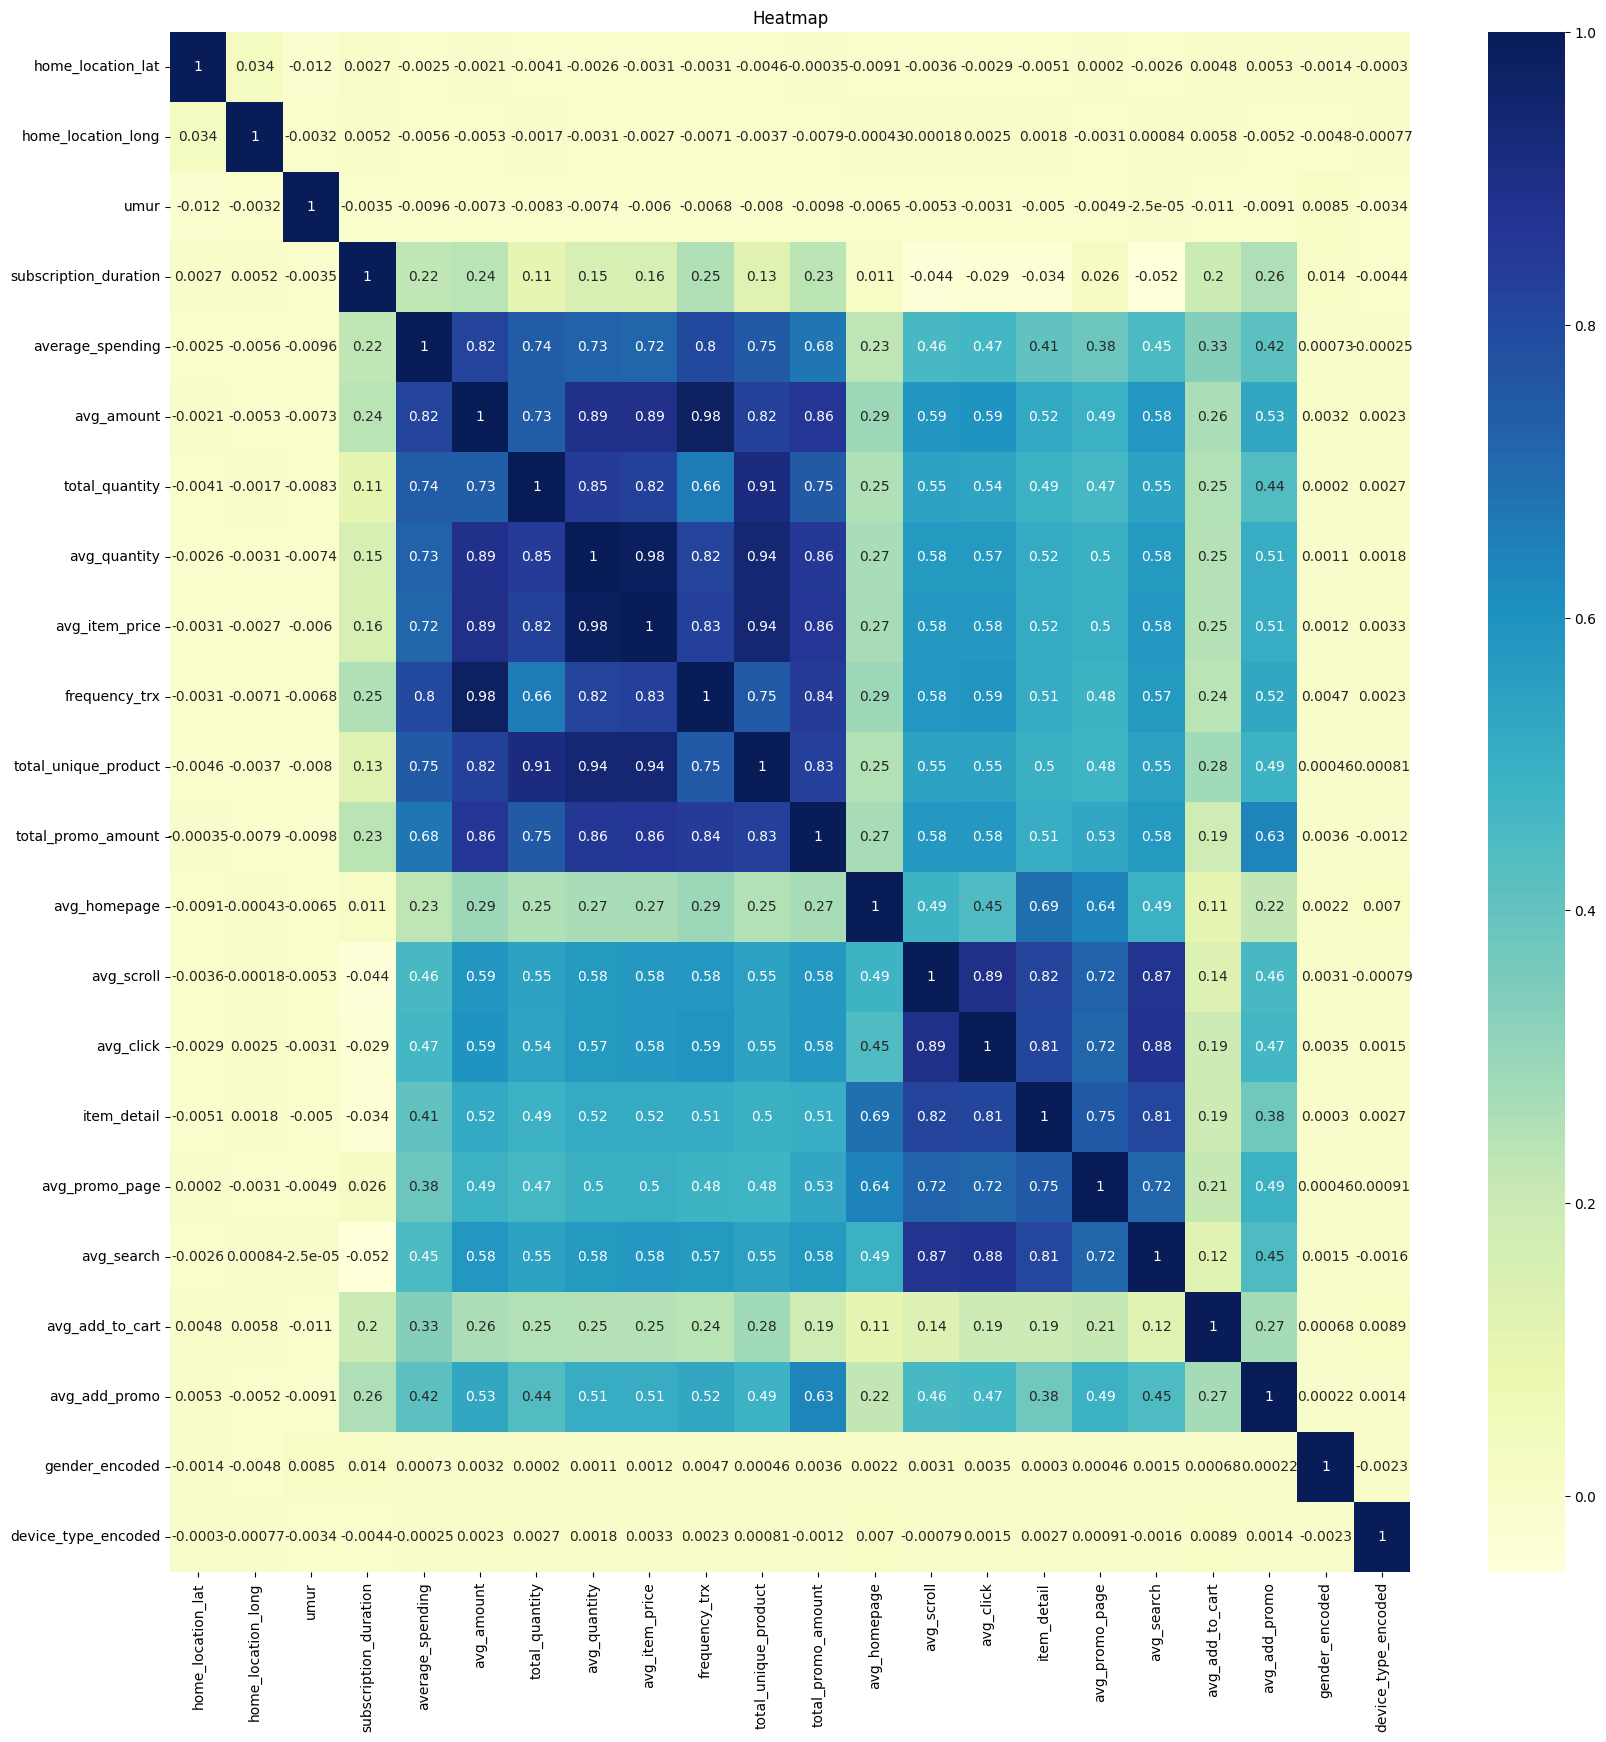

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df_split.corr(), annot=True, cmap="YlGnBu")
plt.title("Heatmap")
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# the independent variables set
X = df_split[['home_location_lat', 'home_location_long', 'umur', 'subscription_duration', 'average_spending', 'avg_amount', 'total_quantity',
          'avg_quantity', 'avg_item_price', 'frequency_trx', 'total_unique_product', 'total_promo_amount', 'avg_homepage', 'avg_scroll',
          'avg_click', 'item_detail', 'avg_promo_page', 'avg_search', 'avg_add_to_cart', 'avg_add_promo', 'gender_encoded', 'device_type_encoded']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

                  feature        VIF
0       home_location_lat   4.394994
1      home_location_long  27.249379
2                    umur  15.013180
3   subscription_duration   7.713010
4        average_spending   6.768653
5              avg_amount  77.267895
6          total_quantity   9.249324
7            avg_quantity  48.718042
8          avg_item_price  52.134586
9           frequency_trx  57.618145
10   total_unique_product  23.363282
11     total_promo_amount   8.648097
12           avg_homepage   3.788305
13             avg_scroll  12.843898
14              avg_click  15.364452
15            item_detail  11.202027
16         avg_promo_page   6.140697
17             avg_search  10.676968
18        avg_add_to_cart   5.088253
19          avg_add_promo   4.794745
20         gender_encoded   1.557746
21    device_type_encoded   1.302423


In [ ]:
df_split = df_master_2month.copy()
df_split.drop(['customer_id', 'name', 'username', 'email', 'gender', 'birthdate', 'device_type', 'device_id', 'device_version',
                  'home_country', 'first_join_date', 'home_location_long', 'umur', 'avg_amount', 'avg_quantity', 'avg_item_price',
                  'frequency_trx', 'total_unique_product', 'avg_scroll', 'avg_click', 'item_detail', 'avg_search'], axis = 1, inplace = True)

In [ ]:
df_split.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41504 entries, 0 to 41503
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   home_location_lat      41504 non-null  float64
 1   subscription_duration  41504 non-null  float64
 2   average_spending       41504 non-null  float64
 3   total_quantity         41504 non-null  float64
 4   total_promo_amount     41504 non-null  float64
 5   avg_homepage           41504 non-null  float64
 6   avg_promo_page         41504 non-null  float64
 7   avg_add_to_cart        41504 non-null  float64
 8   avg_add_promo          41504 non-null  float64
 9   churn                  41504 non-null  int64  
 10  gender_encoded         41504 non-null  int64  
 11  device_type_encoded    41504 non-null  int64  
dtypes: float64(9), int64(3)
memory usage: 3.8 MB


In [ ]:
y = df_split.pop('churn')
X = df_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size= 0.8, random_state=50)

print("X_train dataset shape =", X_train.shape)
print("y_train dataset shape =", y_train.shape)
print("X_test dataset shape  =", X_test.shape)
print("y_test dataset shape  =", y_test.shape)

X_train dataset shape = (33203, 11)
y_train dataset shape = (33203,)
X_test dataset shape  = (8301, 11)
y_test dataset shape  = (8301,)


In [ ]:
model_1_result = prediction(X_train, y_train, X_test, y_test, xgb.XGBClassifier(random_state=42), model_name='xgboost')

In [ ]:
model_2_result = prediction(X_train, y_train, X_test, y_test, LogisticRegression(), model_name='logistic regression')

In [ ]:
model_3_result = prediction(X_train, y_train, X_test, y_test, RandomForestClassifier(random_state=42), model_name='random forest')

In [ ]:
model_4_result = prediction(X_train, y_train, X_test, y_test, KNeighborsClassifier(), model_name='kNN')

In [ ]:
model_5_result = prediction(X_train, y_train, X_test, y_test, DecisionTreeClassifier(), model_name='decision tree')

In [ ]:
baseline_train = pd.DataFrame([
              model_1_result['train'],
              model_2_result['train'],
              model_3_result['train'],
              model_4_result['train'],
              model_5_result['train'],
              ])
baseline_train.sort_values(by=['accuracy'], ascending=False)

,model_name,recall,precision,roc_auc,f1,accuracy
2,random forest,1.000000,1.000000,1.000000,1.000000,1.000000
4,decision tree,1.000000,1.000000,1.000000,1.000000,1.000000
0,xgboost,0.977052,0.977552,0.978531,0.977302,0.978531
3,kNN,0.873754,0.835258,0.860107,0.854072,0.860107
1,logistic regression,0.000000,0.000000,0.500000,0.000000,0.500000


In [ ]:
baseline_model = pd.DataFrame([
              model_1_result['test'],
              model_2_result['test'],
              model_3_result['test'],
              model_4_result['test'],
              model_5_result['test'],
              ])
baseline_model.sort_values(by=['accuracy'], ascending=False)

,model_name,recall,precision,roc_auc,f1,accuracy
0,xgboost,0.937058,0.939670,0.941141,0.938362,0.941141
2,random forest,0.914055,0.932199,0.926763,0.923038,0.926763
4,decision tree,0.891304,0.883488,0.892142,0.887379,0.892142
3,kNN,0.794237,0.776954,0.793321,0.785500,0.793321
1,logistic regression,0.000000,0.000000,0.500000,0.000000,0.500000


### Hyperparameter Tuning

In [ ]:
# Decision Tree

parameters = {'max_features': ['log2', 'sqrt', 'auto'],
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10, 50],
              'min_samples_split': [2, 3, 50, 100],
              'min_samples_leaf': [1, 5, 8, 10]
              }

dt_model = DecisionTreeClassifier()

grid_obj = GridSearchCV(dt_model, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

dt_model = grid_obj.best_estimator_

dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

acc_dt = round(metrics.accuracy_score(y_test, y_pred) * 100, 2)
print("Decision Tree accuracy =", acc_dt)

Decision Tree accuracy = 89.76


In [ ]:
print("Best algorithm =", grid_obj.best_estimator_.get_params())

Best algorithm = {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 50, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 8, 'min_samples_split': 50, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      4345
           1       0.89      0.89      0.89      3956

    accuracy                           0.90      8301
   macro avg       0.90      0.90      0.90      8301
weighted avg       0.90      0.90      0.90      8301



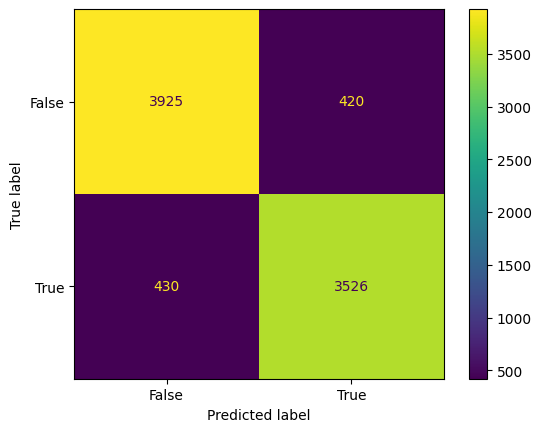

In [ ]:
actual = y_test
predicted = y_pred

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

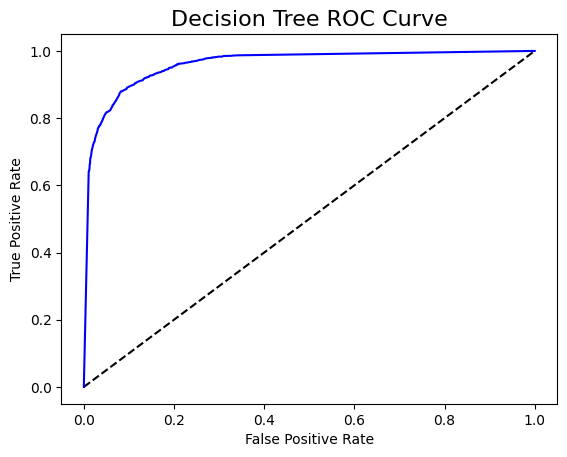

In [ ]:
#ROC
y_dtpred_prob = dt_model.predict_proba(X_test)[:,1]
fpr_clf, tpr_clf, thresholds = roc_curve(y_test, y_dtpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_clf, tpr_clf, label='Decision Tree',color = "b")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve', fontsize=16)
plt.show();

In [ ]:
# Logistic Regression

# Create a Logistic regression classifier
logreg = LogisticRegression()

hyperparameters = {'penalty': ['l1', 'l2'],
                   'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_obj = GridSearchCV(logreg, hyperparameters)
grid_obj = grid_obj.fit(X_train, y_train)

logreg = grid_obj.best_estimator_

# Train the model using the training sets
logreg.fit(X_train, y_train)

# Prediction on test data
y_pred = logreg.predict(X_test)

# Calculating the accuracy
acc_logreg = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of Logistic Regression model : ', acc_logreg )

Accuracy of Logistic Regression model :  52.34


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      1.00      0.69      4345
           1       0.00      0.00      0.00      3956

    accuracy                           0.52      8301
   macro avg       0.26      0.50      0.34      8301
weighted avg       0.27      0.52      0.36      8301



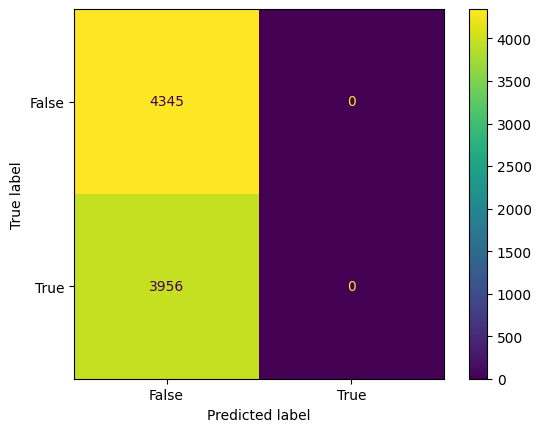

In [ ]:
actual = y_test
predicted = y_pred

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

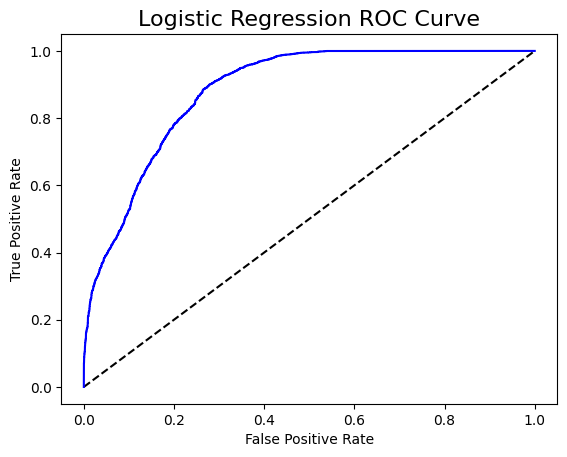

In [ ]:
#ROC
y_dtpred_prob = logreg.predict_proba(X_test)[:,1]
fpr_logreg, tpr_logreg, thresholds = roc_curve(y_test, y_dtpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_logreg, tpr_logreg, label='Logistic Regression',color = "b")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve', fontsize=16)
plt.show();

In [ ]:
#Random Forest

rf = RandomForestClassifier()

parameters = {'n_estimators': [4, 6, 9, 10, 15],
              'max_features': ['log2', 'sqrt','auto'],
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10],
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 5, 8]
             }

grid_obj = GridSearchCV(rf, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

rf = grid_obj.best_estimator_

rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)

acc_rf = round( metrics.accuracy_score(y_test, y_pred) * 100 , 2 )
print( 'Random Forest accuracy =', acc_rf )

Random Forest accuracy = 91.76


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      4345
           1       0.91      0.91      0.91      3956

    accuracy                           0.92      8301
   macro avg       0.92      0.92      0.92      8301
weighted avg       0.92      0.92      0.92      8301



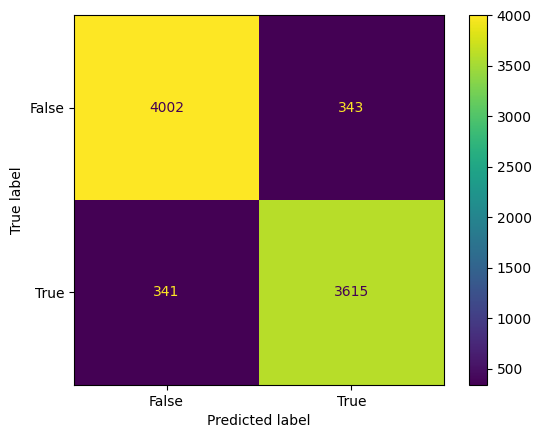

In [ ]:
actual = y_test
predicted = y_pred

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

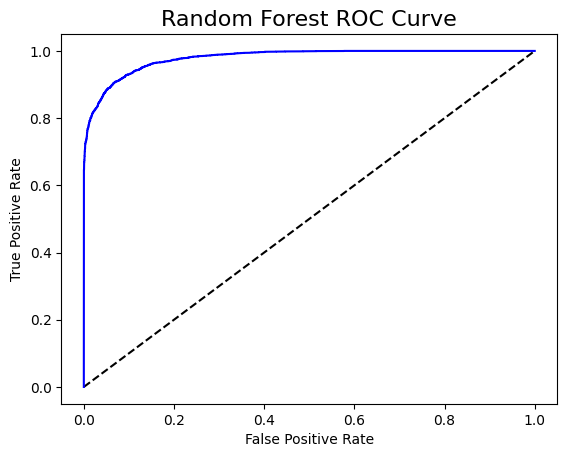

In [ ]:
#ROC

y_dtpred_prob = rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_dtpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "b")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();

In [ ]:
# K - Nearest Neighbors

# Create a KNN Classifier
knn = KNeighborsClassifier()

# Hyperparameter Optimization
parameters = {'n_neighbors': [3, 4, 5, 10],
              'weights': ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size' : [10, 20, 30, 50]
             }

# Run the grid search
grid_obj = GridSearchCV(knn, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the knn to the best combination of parameters
knn = grid_obj.best_estimator_

# Train the model using the training sets
knn.fit(X_train,y_train)

# Prediction on test data
y_pred = knn.predict(X_test)

# Calculating the accuracy
acc_knn = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of KNN model : ', acc_knn )

Accuracy of KNN model :  80.06


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      4345
           1       0.80      0.78      0.79      3956

    accuracy                           0.80      8301
   macro avg       0.80      0.80      0.80      8301
weighted avg       0.80      0.80      0.80      8301



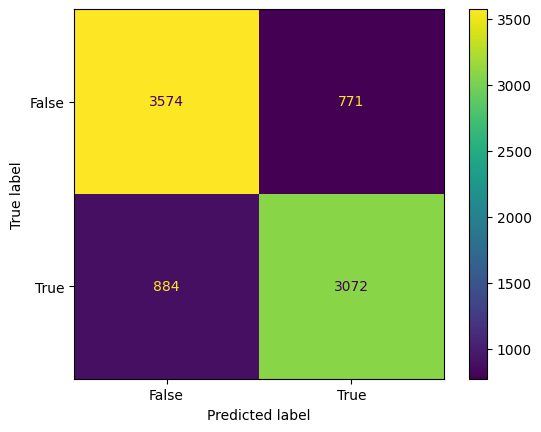

In [ ]:
actual = y_test
predicted = y_pred

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

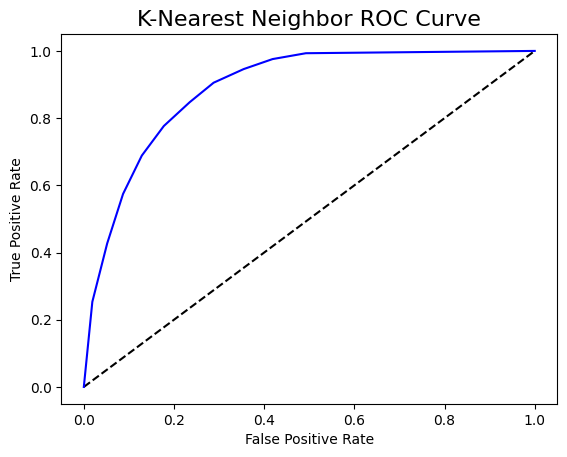

In [ ]:
#ROC
y_dtpred_prob = knn.predict_proba(X_test)[:,1]
fpr_knn, tpr_knn, thresholds = roc_curve(y_test, y_dtpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_knn, tpr_knn, label='K-Nearest Neighbor',color = "b")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('K-Nearest Neighbor ROC Curve', fontsize=16)
plt.show();

In [ ]:
# XGBoost

xgbmodel = xgb.XGBClassifier()

parameters = {'max_depth':range(3,10,2),
              'min_child_weight':range(1,6,2)}

grid_obj = GridSearchCV(xgbmodel, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

xgbmodel = grid_obj.best_estimator_

xgbmodel.fit(X_train,y_train)

y_pred = xgbmodel.predict(X_test)

acc_xgbmodel = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of XGBoost model : ', acc_xgbmodel)

Accuracy of XGBoost model :  94.3


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      4345
           1       0.94      0.94      0.94      3956

    accuracy                           0.94      8301
   macro avg       0.94      0.94      0.94      8301
weighted avg       0.94      0.94      0.94      8301



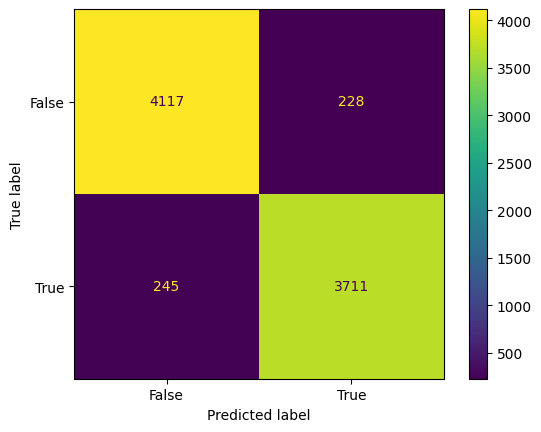

In [ ]:
actual = y_test
predicted = y_pred

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

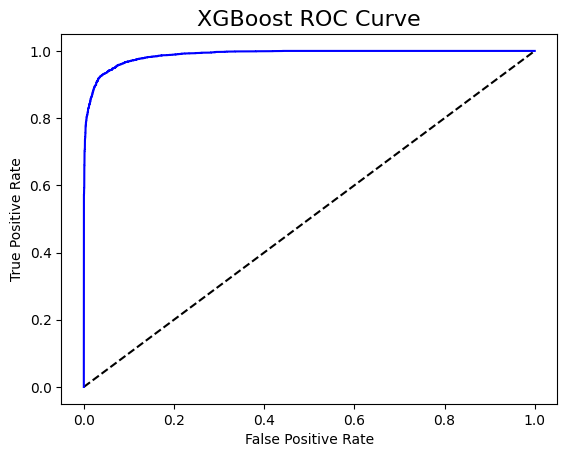

In [ ]:
#ROC
y_dtpred_prob = xgbmodel.predict_proba(X_test)[:,1]
fpr_xgbmodel, tpr_xgbmodel, thresholds = roc_curve(y_test, y_dtpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_xgbmodel, tpr_xgbmodel, label='XGBoost',color = "b")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve', fontsize=16)
plt.show();